# **Transfer learning**
Transfer learning is the process of repurposing knowledge from one task to another. From a modelling perspective, this means using a model trained on one dataset and fine-tuning it for use with another. It is currently very popular in deep learning because it can train deep neural networks with comparatively little data. This is very useful in the data science field since most real-world problems typically do not have millions of labeled data points to train such complex models. 

In transfer learning, a machine exploits the knowledge gained from a previous task to improve generalization about another. For example, in training a classifier to predict whether an image contains food, you could use the knowledge it gained during training to recognize drinks. In transfer learning, the early and middle layers are used and we only retrain the latter layers. It helps leverage the labeled data of the task it was initially trained on.

The general idea is to use the knowledge a model has learned from a task with a lot of available labeled training data in a new task that doesn't have much data. Instead of starting the learning process from scratch, we start with patterns learned from solving a related task.

Transfer learning has several benefits, but the main advantages are  saving training time, better performance of neural networks (in most cases), and not needing a lot of data. With transfer learning a solid machine learning model can be built with comparatively little training data because the model is already pre-trained.

There are a some pre-trained machine learning models out there that are quite popular. One of them is the VGG16 model, which was trained for the ImageNet.

ImageNet is a large database or dataset of over 14 million images. It was designed by academics intended for computer vision research. It was the first of its kind in terms of scale. Images are organized and labelled in a hierarchy. In Machine Learning and Deep Neural Networks, machines are trained on a vast dataset of various images. ImageNet consists of 14,197,122 images organized into 21,841 subcategories. These subcategories can be considered as sub-trees of 27 high-level categories.

# **Transfer Learning using pre-trained model (VGG16) for image classification**
I will be using the VGG16 model, which is a CNN architecture containing 16 convolutional layers in total. I will load the weights of the model so that I can utilize the useful features this model has learned for my task.

In [1]:
import os  #For accessing directory structure and interacting with the operating system
from tqdm import tqdm #For outputting a progress bar 
import cv2  #For computer vision related problems
import numpy as np    #For linear algebra
import pandas as pd  #For data manipulation and analysis
import matplotlib.pyplot as plt    #For data visualization
import matplotlib.image as mpimg
%matplotlib inline
from glob import glob  #Returns file paths
import pathlib  #For file paths related tasks depending on the operating system 
import PIL  #Supports many image file formats for opening/manipulating/saving
from PIL import Image
import random   #Generates pseudo random-variables

import IPython  #A Jupyter kernel to work with Python code in Jupyter notebooks and other interactive frontends
from IPython.display import display

import tensorflow as tf   #For creating Machine Learning applications
import keras  #Provides a python interface for artificial neural networks and allows to work for deep learning
from keras.preprocessing import image
from keras.preprocessing.image import load_img #Loads an image in PIL format
from keras.preprocessing.image import ImageDataGenerator #For creating modified versions of the image(Image data augmentation can be done using the ImageDataGenerator)
from keras.preprocessing.image import array_to_img, img_to_array 

from tensorflow.keras.utils import to_categorical

from keras import models
from keras import layers
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,  Flatten, Dense, Dropout  
from keras import optimizers
from keras import losses
from keras import metrics
#from sklearn.model_selection import train_test_split

from datetime import datetime  #Provides a number of function to deal with time intervals
from keras import Model

print('Imported all the libraries!!')

Imported all the libraries!!


In [41]:
#Importing the VGG16 model from Keras API
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [3]:
#Loading the model trained from scratch to compare with the transfer learned model
scratch_model=load_model('image_classification_model.h5')  
scratch_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dropout (Dropout)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [4]:
#Setting the Image dimensions and batch_size according to my problem
img_height=150
img_width=150
img_size = [150,150]
batch_size=32

In [5]:
#Storing the path of data into the variables
train_data_dir=r"C:\Users\ISHITAA\Dataset\seg_train\seg_train"  #Location of training images
test_data_dir=r"C:\Users\ISHITAA\Dataset\seg_test\seg_test"     #Location of testing images
val_data_dir=r"C:\Users\ISHITAA\Dataset\seg_test\seg_test"     #Location of testing images
pred_data_dir=r"C:\Users\ISHITAA\Dataset\seg_pred\seg_pred"    #Location of prediction images

In [6]:
#Importing VGG16 architecture with weights pre-trained on Imagenet dataset
pretrained_model= VGG16() 
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
#Using VGG16 architecture with weights pre-trained on Imagenet dataset
pretrained_model= VGG16(input_shape=(img_height, img_width, 3), #Giving the input shape according to our problem dataset
                        weights='imagenet', #indicates the weights are taken from the model & are kept intact (frozen)
                        include_top=False)  #indicates softmax layer(last fully connected layer) from the model is not present
#So we discard the weights of the input and the output layer and add our own layers to it, rest all remains the same
pretrained_model.output

<tf.Tensor 'block5_pool/MaxPool_1:0' shape=(None, 4, 4, 512) dtype=float32>

In [8]:
#Summary of the imported VGG model
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

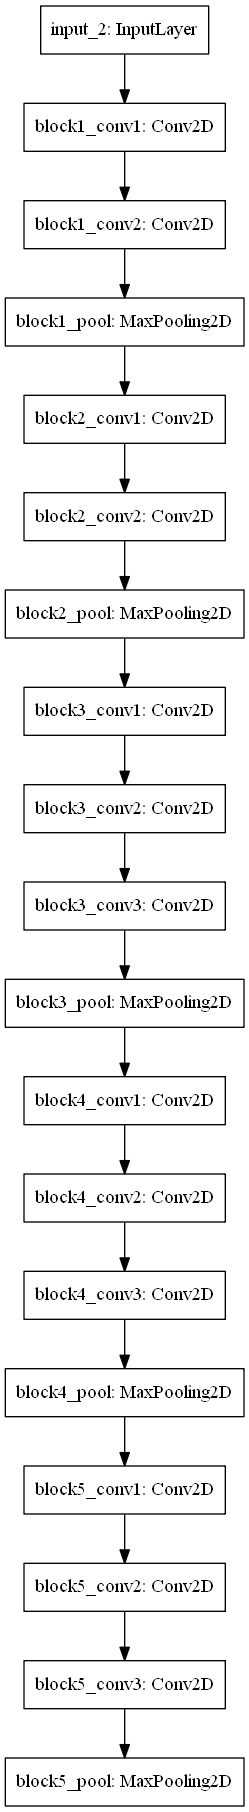

In [30]:
#Plotting a graphical representation of the model
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.plot_model(pretrained_model)

In [9]:
#Freezing the training layers of VGG-16. (because VGG-16 is already trained on huge data)
for layer in pretrained_model.layers:
    print(layer.name)
    layer.trainable=False  #Telling the model not to train the layers present in the model again, we just want to directly use those parameters that the model has learned

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [10]:
train_folders=glob(r'C:\Users\ISHITAA\Dataset\seg_train\seg_train\*')
len(train_folders)

6

In [11]:
from keras import Model

model=Flatten()(pretrained_model.output)  #Condensing the outputs from previous layer into a single dimension using flatten layer which is formed by taking into consideration outputs from previous layer
output=Dense(len(train_folders), activation='softmax')(model)  #Constructing the output layer using Dense layer with 6 neurons only and use the softmax activation function
transfer_learning_model=Model(inputs=pretrained_model.input, outputs=output) #Constructing the model by specifying the inputs which are coming from the vgg model and the output layer which we created jsut now
transfer_learning_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [12]:
#Compliling the model using accuracy to measure the model performance
transfer_learning_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [13]:
#Generating batches of tensor image data

#Augmentation configuration to be used for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  #Undergoing the same preprocessing the steps the pre-trained model undertook
    rescale=1.0/255,   #rescaling factor
    rotation_range=40,   #Degree range for random rotations of the images
    width_shift_range=0.2,  #Specifies the upper bound by which the image is to be randomly shifted(left/right) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    height_shift_range=0.2, #Specifies the upper bound by which the image is to be randomly shifted(up/down) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  #Flips the image horizontally
    vertical_flip=False,   #Here it Doesn't flip the image vertically
    validation_split=0.3,
    fill_mode='nearest'
)

In [37]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1.0/255,   #rescaling factor to standardize the image values in the range[0,1]
    rotation_range=40,   #Degree range for random rotations of the images
    width_shift_range=0.2,  #Specifies the upper bound by which the image is to be randomly shifted(left/right) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    height_shift_range=0.2, #Specifies the upper bound by which the image is to be randomly shifted(up/down) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  #Flips the image horizontally
    vertical_flip=False,   #Here it Doesn't flip the image vertically
    validation_split=0.3,
    fill_mode='nearest'
)

In [15]:
train_generator = train_datagen.flow_from_directory(train_data_dir,  #Identifies classes automatically from the folder name
                                            target_size=(img_height,img_width),
                                            batch_size=batch_size,
                                            classes=['buildings','forest','glacier','mountain','sea','street'],
                                            #color_mode='grayscale',
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            shuffle='False',
                                            subset='training')    #Setting as training data
images_train, labels_train = next(train_generator)

Found 9826 images belonging to 6 classes.


In [38]:
val_generator = val_datagen.flow_from_directory(val_data_dir,  #Identifies classes automatically from the folder name
                                            target_size=(img_height,img_width),
                                            batch_size=batch_size,
                                            classes=['buildings','forest','glacier','mountain','sea','street'],
                                            #color_mode='grayscale',
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            subset='validation')   #Setting as validation data
images_val, labels_val = next(val_generator)

Found 898 images belonging to 6 classes.


In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath="transferlearning_model.h5"   #Give the file path where the model has been saved
checkpoint_dir=os.path.dirname(checkpoint_filepath)

#Creating checkpoint callback
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                            monitor='accuracy',
                                            save_best_only=True,
                                            mode='max',
                                            verbose=1)

#Creating early stopping callback
#early_stop=tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                         #   min_delta=0,
                                         #   patience=2,
                                         #   mode='max',
                                         #   verbose=1)

#callbacks_list = [checkpoint, early_stop]
callbacks_list = [checkpoint]

start=datetime.now()

In [17]:
#Training(fitting) the model
history=transfer_learning_model.fit(train_generator, 
                  epochs=10, 
                  verbose=1, 
                  steps_per_epoch=307,  # train_data_size//batch_size = 9826//32
                  validation_data=val_generator,
                  validation_steps=28,   # val_data_size//batch_size = 898//32
                  callbacks=callbacks_list)   #pass callback to training    
history

duration=datetime.now()-start
print("Training completed in time: ", duration)

Epoch 1/10
307/307 [==============================] - ETA: 0s - loss: 0.6418 - accuracy: 0.7578
Epoch 00001: accuracy improved from -inf to 0.75781, saving model to transferlearning_model.h5
307/307 [==============================] - 899s 3s/step - loss: 0.6418 - accuracy: 0.7578 - val_loss: 0.6944 - val_accuracy: 0.7522
Epoch 2/10
307/307 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.8198
Epoch 00002: accuracy improved from 0.75781 to 0.81979, saving model to transferlearning_model.h5
307/307 [==============================] - 897s 3s/step - loss: 0.5007 - accuracy: 0.8198 - val_loss: 0.5429 - val_accuracy: 0.8047
Epoch 3/10
307/307 [==============================] - ETA: 0s - loss: 0.4778 - accuracy: 0.8257
Epoch 00003: accuracy improved from 0.81979 to 0.82571, saving model to transferlearning_model.h5
307/307 [==============================] - 899s 3s/step - loss: 0.4778 - accuracy: 0.8257 - val_loss: 0.5306 - val_accuracy: 0.8203
Epoch 4/10
307/307 [=====

**After Training:**

Training Accuracy: 84.88%

Validation Accuracy: 84.04%

Training Loss: 42.52%

Validation Loss: 49.41%

In [18]:
#Listing all the data in history
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
print(history.history['loss'])

[0.6418070197105408, 0.5006910562515259, 0.47780144214630127, 0.4516286551952362, 0.4326005280017853, 0.4389507472515106, 0.42540186643600464, 0.4131406247615814, 0.4236346483230591, 0.42300865054130554]


In [20]:
print(history.history['val_loss'])

[0.6944176554679871, 0.54285728931427, 0.5306049585342407, 0.49045827984809875, 0.4926068186759949, 0.5428040623664856, 0.5364802479743958, 0.5164600610733032, 0.463013619184494, 0.5600870847702026]


In [21]:
print(history.history['accuracy'])

[0.7578108906745911, 0.8197876214981079, 0.8257096409797668, 0.8350009918212891, 0.8480702638626099, 0.8381662368774414, 0.8438839912414551, 0.8479681611061096, 0.8430671691894531, 0.844700813293457]


In [22]:
print(history.history['val_accuracy'])

[0.7522321343421936, 0.8046875, 0.8203125, 0.8158482313156128, 0.8169642686843872, 0.8002232313156128, 0.8191964030265808, 0.8091517686843872, 0.8292410969734192, 0.8035714030265808]


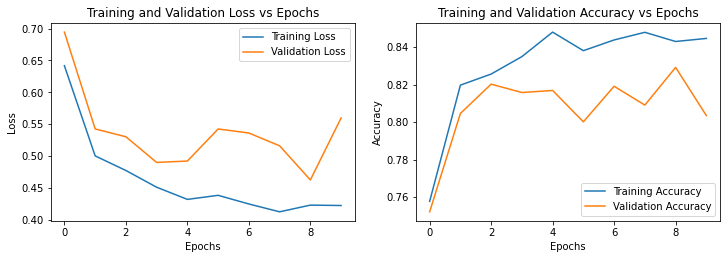

In [23]:
#Visualizing the training performance:

#Plotting training and validation accuracy & loss curves

epochs = range(len(history.history['loss']))

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#Plotting losses


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.plot(epochs, loss, label='Training Loss')  #,'ro'
plt.plot(epochs, val_loss, label='Validation Loss') #, 'r'
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Plotting accuracy

plt.subplot(2, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')  #,'bo'
plt.plot(epochs, val_accuracy, label='Validation Accuracy')   #, 'b'
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

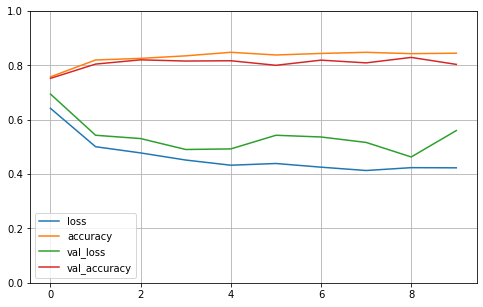

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
#Loading the model
tl_model=load_model('transferlearning_model.h5')

In [19]:
#Evaluating the model's performance....train_generator was used to train the model and val_generator to estimate its performance
train_loss, train_accuracy=tl_model.evaluate(train_generator, steps=16)   #Will return a list of two values...1)loss of model 2) accuracy of model....Since we don't want loss but only want accuracy, we ignore the loss value
val_loss, val_accuracy=tl_model.evaluate(val_generator, steps=16)
print('Accuracy of the model on the train set obtained by transfer learning is: %.2f' % (train_accuracy*100))
print('Accuracy of the model on the test set obtained by transfer learning is: %.2f' % (val_accuracy*100))

16/16 [==============================] - 39s 2s/step - loss: 0.4756 - accuracy: 0.8203
Accuracy of the model on the train set obtained by transfer learning is: 86.13
Accuracy of the model on the test set obtained by transfer learning is: 82.03


In [48]:
img_pred=image.load_img(r'C:\Users\ISHITAA\Dataset\seg_pred\seg_pred\374.jpg', target_size=(img_height,img_width))  #The given image is of a forest!
img_pred=image.img_to_array(img_pred) #Making the image size compatible with VGG16 input, this will convert from a 3D img to 3D array
print(img_pred.shape)
img_pred=np.expand_dims(img_pred, axis=0)  #Creating batch axis  #creating a batch of one image  #Adding the fouth dimension, for number of images
print(img_pred.shape)
img_pred=preprocess_input(img_pred)  #Mean centering with respect to Image
prediction=tl_model.predict(img_pred)
print(prediction.shape)
#p=decode_predictions(prediction, top=3)[0]
print("Predicted:", prediction)

(150, 150, 3)
(1, 150, 150, 3)
(1, 6)
Predicted: [[0. 1. 0. 0. 0. 0.]]


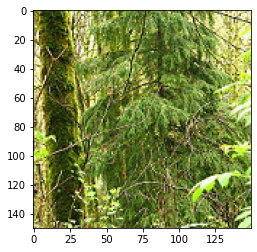

The probabilty that this image is of a forest: 0.8400795


In [28]:
img=Image.open(r'C:\Users\ISHITAA\Dataset\seg_pred\seg_pred\374.jpg')
img=np.asarray(img.resize((img_height,img_width), Image.ANTIALIAS))/255
plt.imshow(img)
plt.show()
prediction=tl_model.predict(np.array([img]))
print('The probabilty that this image is of a forest:', prediction[0][1])

In [33]:
#Defining the class names and their labels
class_names = [ 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']   #Creating a dictionary of class names according to the label
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

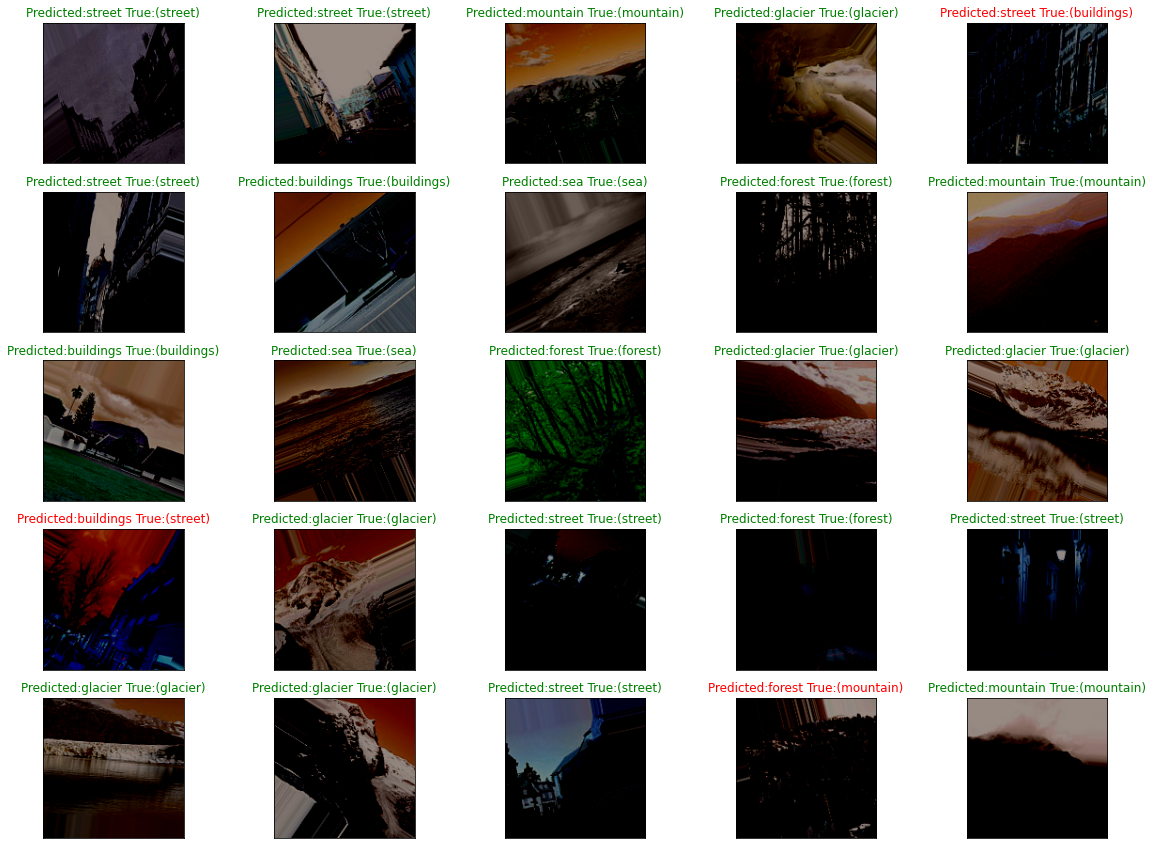

In [39]:
# Using model to predict on test data
Y_pred = tl_model.predict(images_val)

# Plotting the predictions of different natural scenes and checking their original labels

labels=list(class_names_label.keys())
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(images_val.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images_val[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(labels_val[idx])
    ax.set_title("Predicted:{} True:({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# **<center>Thank You!</center>**